# Klasterovanje i klasifikacija

- Klasterovanje
- Analiza glavnih komponenata
- Stablo odlučivanja

In [8]:
import pandas as pd

In [9]:
churn = pd.read_csv('churn.csv')

In [10]:
churn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [5]:
churn.shape

(3333, 21)

In [6]:
churn_cluster=churn.loc[:, {'Day Mins','Day Calls','Eve Mins','Eve Calls','Night Mins','Night Calls', \
                        'Intl Mins', 'Intl Calls'}]

In [7]:
churn_cluster

,Day Calls,Day Mins,Eve Calls,Intl Mins,Intl Calls,Eve Mins,Night Mins,Night Calls
0,110,265.1,99,10.0,3,197.4,244.7,91
1,123,161.6,103,13.7,3,195.5,254.4,103
2,114,243.4,110,12.2,5,121.2,162.6,104
3,71,299.4,88,6.6,7,61.9,196.9,89
4,113,166.7,122,10.1,3,148.3,186.9,121
5,98,223.4,101,6.3,6,220.6,203.9,118
6,88,218.2,108,7.5,7,348.5,212.6,118
7,79,157.0,94,7.1,6,103.1,211.8,96
8,97,184.5,80,8.7,4,351.6,215.8,90
9,84,258.6,111,11.2,5,222.0,326.4,97


In [8]:
from sklearn import cluster

# K-Means

In [9]:
help(cluster.KMeans())

Help on KMeans in module sklearn.cluster.k_means_ object:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time 

In [10]:
k_means = cluster.KMeans(n_clusters =10)
k_means.fit(churn_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
k_means.labels_

array([3, 1, 6, ..., 5, 6, 5])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

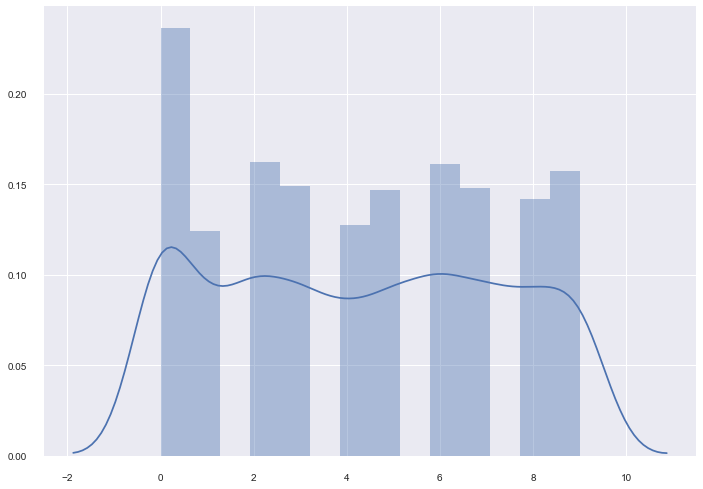

In [14]:
sns.distplot(k_means.labels_)
sns.despine(offset=10, trim=True)

In [15]:
k_means.cluster_centers_

array([[  99.98027613,  179.54378698,   99.9704142 ,   10.33530572,
           4.57593688,  202.26863905,  205.14615385,  100.89151874],
       [ 102.20676692,  178.39285714,  102.04511278,   10.17894737,
           4.46992481,  229.38345865,  278.04736842,  100.54511278],
       [ 100.9137931 ,  115.6433908 ,   99.73275862,   10.16695402,
           4.66091954,  253.32442529,  205.18821839,  100.33908046],
       [ 100.509375  ,  250.8940625 ,  101.7125    ,   10.216875  ,
           4.496875  ,  181.4175    ,  243.861875  ,  100.1625    ],
       [ 100.04029304,  100.87289377,  101.83516484,   10.08608059,
           4.32600733,  162.34908425,  178.19413919,   98.52014652],
       [  99.1047619 ,  214.17714286,   97.24761905,   10.00412698,
           4.30793651,  273.02095238,  200.37492063,  100.19047619],
       [ 102.21965318,  198.15404624,  100.30346821,   10.16271676,
           4.48843931,  130.36965318,  174.76040462,  101.00578035],
       [  99.70977918,  145.93470032,   9

In [16]:
cluster_representatives=pd.DataFrame(k_means.cluster_centers_, columns= churn_cluster.columns, index = range(1,11))
cluster_representatives

,Day Calls,Day Mins,Eve Calls,Intl Mins,Intl Calls,Eve Mins,Night Mins,Night Calls
1,99.980276,179.543787,99.970414,10.335306,4.575937,202.268639,205.146154,100.891519
2,102.206767,178.392857,102.045113,10.178947,4.469925,229.383459,278.047368,100.545113
3,100.913793,115.643391,99.732759,10.166954,4.660920,253.324425,205.188218,100.339080
4,100.509375,250.894063,101.712500,10.216875,4.496875,181.417500,243.861875,100.162500
5,100.040293,100.872894,101.835165,10.086081,4.326007,162.349084,178.194139,98.520147
6,99.104762,214.177143,97.247619,10.004127,4.307937,273.020952,200.374921,100.190476
7,102.219653,198.154046,100.303468,10.162717,4.488439,130.369653,174.760405,101.005780
8,99.709779,145.934700,97.435331,10.275710,4.347003,153.573502,252.608833,99.473186
9,100.819079,248.461842,100.802632,10.231579,4.470395,206.665461,152.741776,100.503289
10,99.228487,162.670920,100.673591,10.613947,4.545994,217.064985,128.643323,98.818991


In [17]:
dir(k_means)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_fit_data',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

# Dijagram silueta - Silhouette plot

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [19]:
cluster_labels = k_means.fit_predict(churn_cluster)
silhouette_avg = silhouette_score(churn_cluster, cluster_labels)

In [20]:
silhouette_avg

0.15829367258637483

In [21]:
sample_silhouette_values = silhouette_samples(churn_cluster, cluster_labels)
sample_silhouette_values

array([ 0.369066  , -0.00336235,  0.33281096, ...,  0.31998773,
        0.14956348,  0.14082271])

In [22]:
import numpy as np
np.sort(sample_silhouette_values, axis = None)

array([-0.10437499, -0.10174499, -0.1007356 , ...,  0.43993806,
        0.44169984,  0.44316607])

# Hijerarhijsko klasterovanje

In [23]:
help(cluster.FeatureAgglomeration)

Help on class FeatureAgglomeration in module sklearn.cluster.hierarchical:

class FeatureAgglomeration(AgglomerativeClustering, sklearn.cluster._feature_agglomeration.AgglomerationTransform)
 |  Agglomerate features.
 |  
 |  Similar to AgglomerativeClustering, but recursively merges features
 |  instead of samples.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int, default 2
 |      The number of clusters to find.
 |  
 |  affinity : string or callable, default "euclidean"
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or 'precomputed'.
 |      If linkage is "ward", only "euclidean" is accepted.
 |  
 |  memory : None, str or object with the joblib.Memory interface, optional
 |      Used to cache the output of the computation of the tree.
 |      By default, no caching is done. If a string is given, it is the
 |      path to the caching directory.
 |

In [24]:
agglo = cluster.FeatureAgglomeration(n_clusters = 10)

In [25]:
agglo.fit(churn_cluster.transpose())

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=None, linkage='ward', memory=None, n_clusters=10,
           pooling_func=<function mean at 0x00000270F1BC0BF8>)

In [26]:
agglo.labels_

array([3, 0, 1, ..., 2, 6, 3], dtype=int64)

In [27]:
dir(agglo)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 'affinity',
 'children_',
 'compute_full_tree',
 'connectivity',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'labels_',
 'linkage',
 'memory',
 'n_clusters',
 'n_components_',
 'n_leaves_',
 'pooling_func',
 'set_params',
 'transform']

# Analiza glavnih komponenti

In [28]:
from sklearn import decomposition

In [29]:
pca = decomposition.PCA()
pca.fit(churn_cluster)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
print(pca.explained_variance_)

[ 2968.28289799  2598.1812593   2530.82330523   405.23104557   397.21981239
   379.18835182     7.81259183     6.02679561]


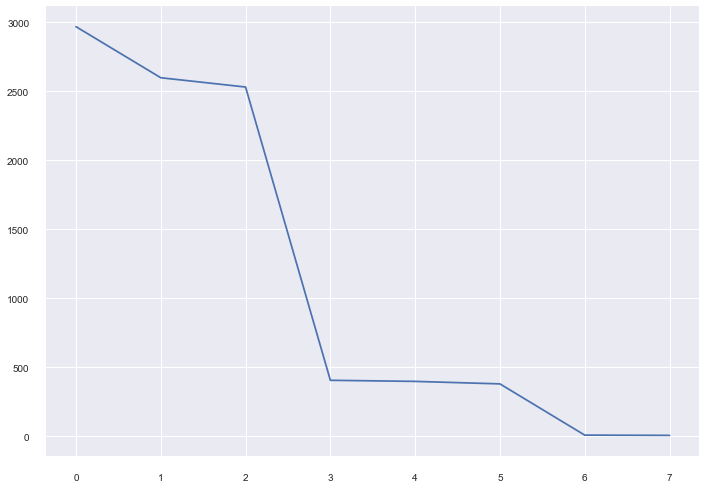

In [31]:
#plt.plot(x = [1,2,3,4,5,6,7,8], y = pca.explained_variance_)

plt.plot(pca.explained_variance_, scalex=True)
#sns.distplot(pca.explained_variance_)
#sns.factorplot(x= [1,2,3,4,5,6,7,8], y=pca.explained_variance_)
sns.despine(offset=10, trim=True)

In [32]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

In [33]:
pca.n_components = 3

In [34]:
pca.components_[0:3, :]

array([[ -2.68407584e-03,  -9.98504409e-01,  -6.42762617e-03,
          5.64365590e-04,  -3.56754737e-04,  -4.67641836e-02,
         -2.56700677e-02,  -9.70250524e-03],
       [  1.44736900e-02,   1.99602331e-02,   3.63117513e-03,
         -6.13941430e-05,  -4.58934973e-04,  -7.74577064e-01,
          6.31987796e-01,   7.06464942e-04],
       [  1.80465234e-03,  -4.94762953e-02,  -4.56521852e-03,
         -1.02103232e-03,  -4.14989509e-04,   6.30637045e-01,
          7.74462384e-01,   5.63175439e-03]])

In [35]:
churn_cluster_pca=pca.fit_transform(churn_cluster)

In [36]:
churn_cluster_pca.shape

(3333, 3)

In [37]:
churn_cluster_pca_frame=pd.DataFrame(churn_cluster_pca, columns= range(1,4), index = churn_cluster.index)
churn_cluster_pca_frame

,1,2,3
0,-86.084674,32.303743,27.435560
1,16.925440,38.050770,38.939434
2,-58.953229,39.113149,-83.101572
3,-112.578357,107.127097,-96.761715
4,15.501105,31.990621,-43.354913
5,-44.730403,-12.432386,12.655239
6,-45.760480,-106.226143,100.257174
7,27.172186,81.931753,-52.168182
8,-11.908760,-107.267519,106.344178
9,-82.907635,64.423314,106.474435


# Klasifikacija - Stablo odlučivanja

In [11]:
from sklearn import tree

In [12]:
#x=churn.loc[:, {'State', 'Account Length', "Int'l Plan",
#       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
#       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
#       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
#       'CustServ Calls'}]

x=churn.loc[:, {'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'}]

In [13]:
x.head()

,CustServ Calls,Intl Charge,Intl Mins,Intl Calls
0,1,2.70,10.0,3
1,1,3.70,13.7,3
2,0,3.29,12.2,5
3,2,1.78,6.6,7
4,3,2.73,10.1,3


In [14]:
y=churn.loc[:, 'Churn?']
y.head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn?, dtype: object

In [43]:
help(tree.DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree.tree object:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [17]:
import graphviz

In [24]:
y.name

'Churn?'

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x.columns,  
                         class_names=y.name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 